In [ ]:
"""
RNP
Jesus Roberto Arriaga Villarreal
1995060
N4
"""

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar datos
train_data = train_data / 255.0
test_data = test_data / 255.0

# Reshape para que sea compatible con la entrada de la red neuronal
train_data = train_data.reshape((train_data.shape[0], 28 * 28))
test_data = test_data.reshape((test_data.shape[0], 28 * 28))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Definir modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar al modelo
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2463 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1040 - accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0737 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0541 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0427 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0246 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

In [ ]:
# Evaluar el modelo con datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Exactitud del modelo en datos de prueba: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9779
Exactitud del modelo en datos de prueba: 0.9779000282287598


In [ ]:
# Realizar predicciones con datos de prueba
predictions = model.predict(test_data[:5])

# Mostrar predicciones y valores reales
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = test_labels[i]
    print(f'Predicción: {predicted_label}, Valor Real: {true_label}')

1/1 [==============================] - 0s 106ms/step
Predicción: 7, Valor Real: 7
Predicción: 2, Valor Real: 2
Predicción: 1, Valor Real: 1
Predicción: 0, Valor Real: 0
Predicción: 4, Valor Real: 4


313/313 [==============================] - 3s 8ms/step


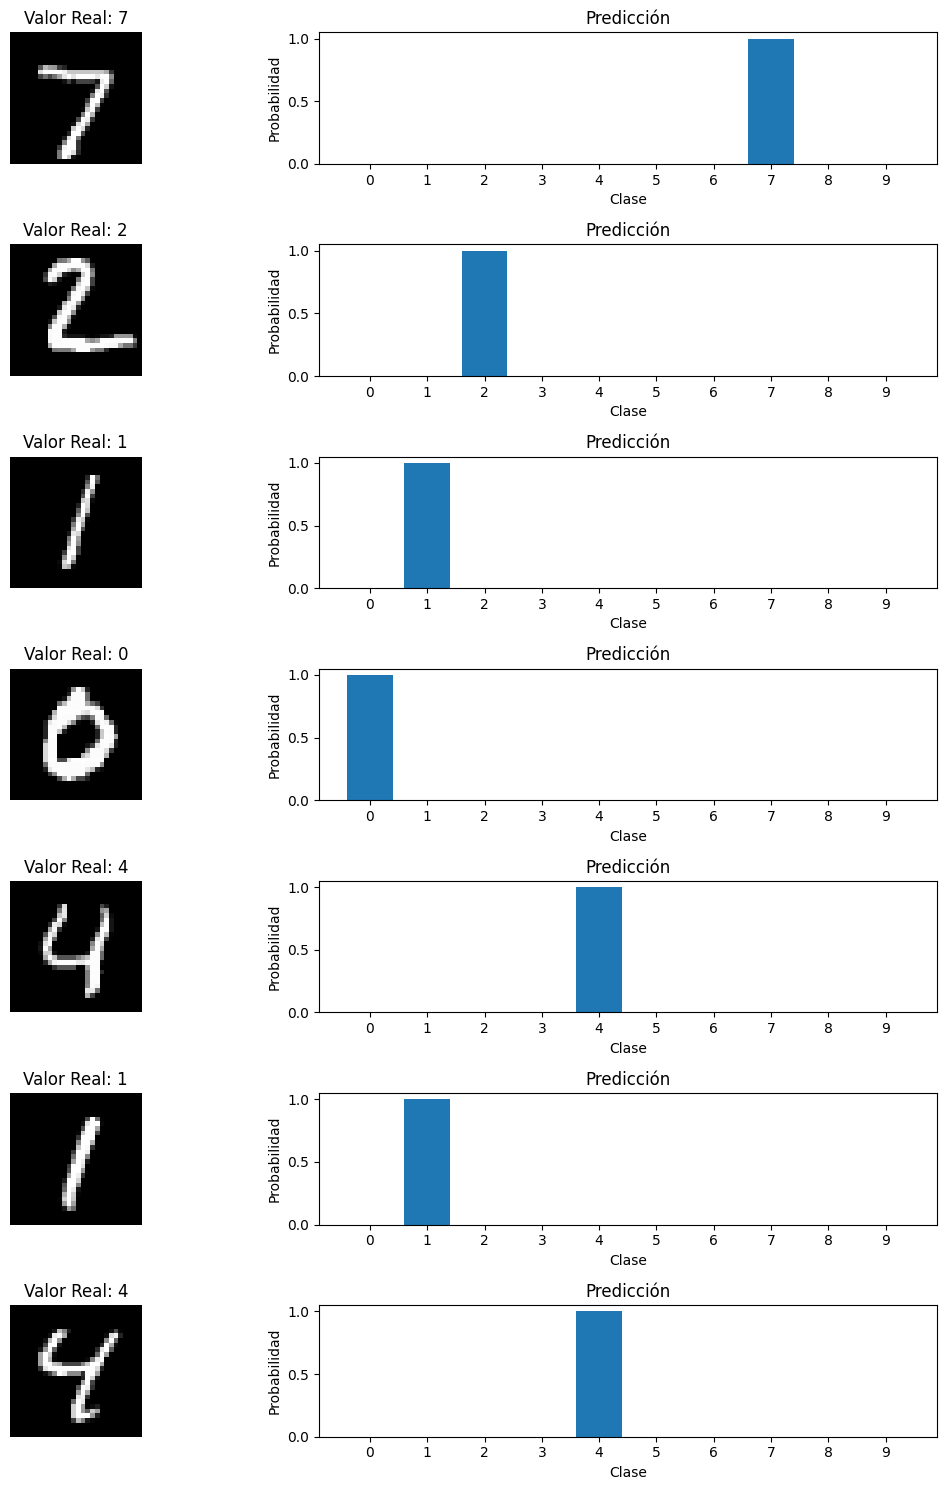

In [8]:
predictions = model.predict(test_data)

# Mostrar predicciones y valores reales de las muestras (por ejemplo, las primeras 7 muestras)
num_samples = 7
plt.figure(figsize=(12, 15))

for i in range(num_samples):
    plt.subplot(num_samples, 2, 2*i+1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Valor Real: {test_labels[i]}')
    plt.axis('off')

    plt.subplot(num_samples, 2, 2*i+2)
    plt.bar(np.arange(10), predictions[i], tick_label=np.arange(10))
    plt.title('Predicción')
    plt.xlabel('Clase')
    plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()